In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn .model_selection import train_test_split

In [79]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
df.columns=df.columns.str.lower()
categorical=df.select_dtypes("object").columns
for col in categorical:
    df[col]=df[col].str.lower().str.replace(" " , "_")
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [82]:
df["seniorcitizen"]=df["seniorcitizen"].astype("object")

In [83]:
df["totalcharges"]=pd.to_numeric(df["totalcharges"] , errors="coerce")
df["totalcharges"].isnull().sum()
df.dropna(inplace=True)
df["totalcharges"].isnull().sum()

0

In [84]:
df["churn"]=(df["churn"]=="yes").astype("int64")
df["churn"].dtype

dtype('int64')

In [85]:
df.describe()

,tenure,monthlycharges,totalcharges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<Axes: >

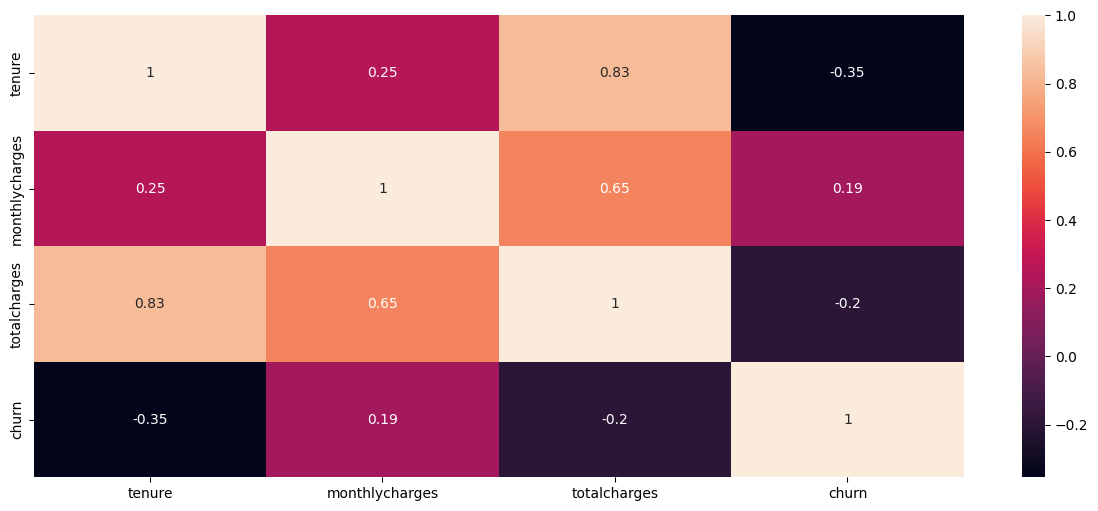

In [86]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [87]:
df.drop("totalcharges" , axis=1 , inplace=True)

In [88]:
df.describe()

,tenure,monthlycharges,churn
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.265785
std,24.545260,30.085974,0.441782
min,1.000000,18.250000,0.000000
25%,9.000000,35.587500,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.862500,1.000000
max,72.000000,118.750000,1.000000


In [89]:
df.describe (include="object")

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-vhveg,male,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [90]:
df.drop("customerid" , axis=1 , inplace=True)

In [91]:
global_mean=(df["churn"]==1).sum ()/7032
global_mean

0.26578498293515357

In [92]:
categorical=df.select_dtypes("object").columns
for col in categorical :
    group=df.groupby(df[col]).churn.agg(["mean"])
    group["diff"]=group["mean"]-global_mean
    display(group)

,mean,diff
gender,,
female,0.269595,0.003810
male,0.262046,-0.003739


,mean,diff
seniorcitizen,,
0,0.236503,-0.029282
1,0.416813,0.151028


,mean,diff
partner,,
no,0.329761,0.063976
yes,0.197171,-0.068614


,mean,diff
dependents,,
no,0.312791,0.047006
yes,0.155312,-0.110473


,mean,diff
phoneservice,,
no,0.250000,-0.015785
yes,0.267475,0.001690


,mean,diff
multiplelines,,
no,0.250812,-0.014973
no_phone_service,0.250000,-0.015785
yes,0.286485,0.020700


,mean,diff
internetservice,,
dsl,0.189983,-0.075802
fiber_optic,0.418928,0.153143
no,0.074342,-0.191443


,mean,diff
onlinesecurity,,
no,0.417787,0.152002
no_internet_service,0.074342,-0.191443
yes,0.146402,-0.119383


,mean,diff
onlinebackup,,
no,0.399417,0.133632
no_internet_service,0.074342,-0.191443
yes,0.215670,-0.050115


,mean,diff
deviceprotection,,
no,0.391403,0.125618
no_internet_service,0.074342,-0.191443
yes,0.225393,-0.040392


,mean,diff
techsupport,,
no,0.416475,0.150690
no_internet_service,0.074342,-0.191443
yes,0.151961,-0.113824


,mean,diff
streamingtv,,
no,0.335351,0.069566
no_internet_service,0.074342,-0.191443
yes,0.301147,0.035362


,mean,diff
streamingmovies,,
no,0.337289,0.071504
no_internet_service,0.074342,-0.191443
yes,0.299524,0.033739


,mean,diff
contract,,
month-to-month,0.427097,0.161312
one_year,0.112772,-0.153013
two_year,0.028487,-0.237298


,mean,diff
paperlessbilling,,
no,0.163757,-0.102028
yes,0.335893,0.070108


,mean,diff
paymentmethod,,
bank_transfer_(automatic),0.167315,-0.098470
credit_card_(automatic),0.152531,-0.113254
electronic_check,0.452854,0.187069
mailed_check,0.192020,-0.073765


In [93]:
df.drop(["gender" , "phoneservice" , "multiplelines" , "streamingtv"] , axis=1 , inplace =True)

In [94]:
categorical =df.select_dtypes("object").columns
df=pd.get_dummies(df , columns=categorical)
df

,tenure,monthlycharges,churn,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,internetservice_dsl,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,1,29.85,0,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,0,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,1,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,0,True,False,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,1,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,True,False,False,True,False,True,True,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,0,True,False,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,0,True,False,False,True,False,True,True,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,1,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [95]:
x = df.drop(["churn"], axis=1)
y = df["churn"]
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(solver="saga",penalty='l1')
model.fit(x_scaled , y_train)
model.score(x_scaled, y_train)

0.8055111111111111

In [96]:
x=df.drop(["churn"] , axis=1)
y=df["churn"]
x_train , x_test , y_train , y_test =train_test_split(x, y , test_size=0.2 , random_state=0)
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_train)
model=LogisticRegression()
model.fit(x_scaled , y_train)
model.score(x_scaled, y_train)

0.8048

In [97]:
model.score(x_test , y_test)

c:\Users\HASSNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7874911158493249

In [98]:
y_predicted =model.predict(x_test)
y_predicted

c:\Users\HASSNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
y_predicted=model.predict_proba(x_test)
y_predicted

c:\Users\HASSNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[4.04687824e-01, 5.95312176e-01],
       [1.00000000e+00, 2.46762619e-15],
       [5.81889546e-01, 4.18110454e-01],
       ...,
       [9.47577892e-02, 9.05242211e-01],
       [1.00000000e+00, 2.21313745e-54],
       [9.99943665e-01, 5.63347496e-05]])

In [100]:
y_predicted =y_predicted[: , 1]
y_predicted=(y_predicted >0.8).astype("int64")
y_predicted


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)